### Zadania
1. 

1.

1. 

1. 

1. Zaimplementować algorytm Neville’a i sprawdzić (dla kilku wybranych punktów), czy daje te same wartości wielomianu co wybrana interpolacja wielomianowa.<b>(1 pkt)</b>

1. Poeksperymentować z  interpolacją funkcjami sklejanymi (minimum dwie różne funkcje sklejane),  narysować wykresy i porównać z wykresami interpolacji wielomianowej. <b>Zademonstrować  efekt Rungego</b> <b>(1 pkt)</b>. 

In [70]:
using Plots, Interpolations, Polynomials, LinearAlgebra,Statistics,DataFrames,Measures

## Zad 1
Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny  Lagrange'a .  Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. <b>(1 pkt)</b>

In [71]:
function Lagrange(x_vals,y_vals,x)
    P = 0
    len = size(x_vals)[1]
    
    for j in 1:len
        L = 1
        for i in 1:len
            if i != j
                L *= (x-x_vals[i])/(x_vals[j]-x_vals[i])
            end
        end
        P += (y_vals[j]*L)
    end
    return P
end


Lagrange (generic function with 1 method)

In [72]:
opints_nr = 0:7
x_vals = [x for x in opints_nr]
# y_vals = [rand(Uniform(0.0,20.0)) for _ in opints_nr]
y_vals = [rand() for _ in opints_nr]
distrib = 0:0.01:7

0.0:0.01:7.0

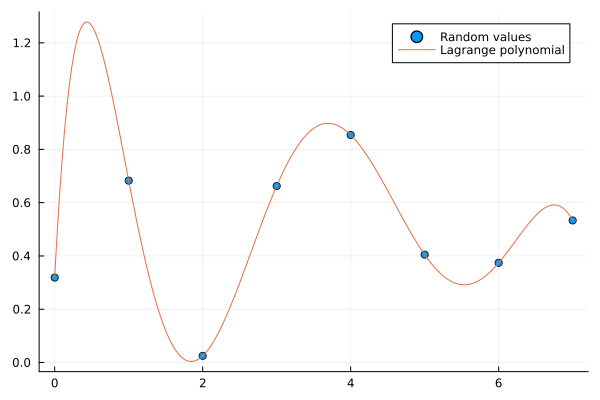

In [73]:
lagrange_polynom = [Lagrange(x_vals,y_vals,x) for x in distrib]
scatter(x_vals,y_vals,label="Random values")
plot!(distrib,lagrange_polynom,label="Lagrange polynomial")

## Zad 2
Zrobic to samo dla metody  Newtona (metoda ilorazów róznicowych).Narysować wykres wielomianu interpolacyjnego otrzymanego metodą Newtona dla tych samych danych, co w poprzednim punkcie. Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ : 
   1. napisać funkcję `NewtonInterpolation`, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" `newt`
   1. napisać funkcję która wylicza wartość wielomianu dla obiektu `newt` w punkcie x za pomocą  <b>schematu Hornera dla postaci Newtona </b> <b>(2 pkt)</b>


In [75]:
function NewtonInterpolation(x_vals, y_vals)
    n = length(x_vals)
    d = zeros(n, n)
    d[:, 1] .= y_vals
    for j = 2:n
        for i = j:n
            d[i, j] = (d[i, j-1] - d[i-1, j-1]) / (x_vals[i] - x_vals[i-j+1])
        end
    end
    return d
end

function Newton(x_vals, y_vals, x)
    n = length(x_vals)
    divided = diag(NewtonInterpolation(x_vals, y_vals))
    result = divided[n]
    for i = n-1:-1:1
        result = divided[i] + (x - x_vals[i]) * result
    end
    return result
end


Newton (generic function with 1 method)

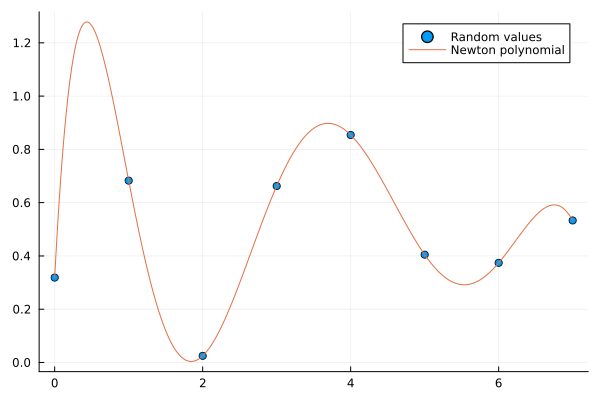

In [76]:
new_polynom = [Newton(x_vals,y_vals, x) for x in distrib]
scatter(x_vals,y_vals,label="Random values")
plot!(distrib,new_polynom,label="Newton polynomial")

### Zad3
Zastosować interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego? <b>(1 pkt)</b>

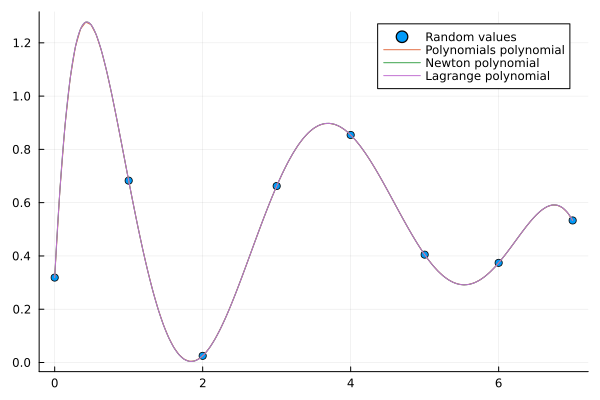

In [77]:
using Polynomials
pack_polynom=fit(x_vals, y_vals)
scatter(x_vals,y_vals,label="Random values")
plot!(pack_polynom, extrema(x_vals)...,label="Polynomials polynomial")
plot!(distrib,new_polynom,label="Newton polynomial")
plot!(distrib,lagrange_polynom,label="Lagrange polynomial")

Zauważamy trzykrotnie dokładnie te same wyniki - jest to spodziewany efekt, gdyż wszystkie 3 metody powinny zwracać ten sam wielomian

### Zad4
Porównać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Uwaga: dodatkowo, dla metody Newtona i pakietu Polynomials należy osobno zmierzyć czas wyliczania wielomianu i osobno czas wyliczania wartości w punkcie. Dokonać pomiaru 10 razy i policzyć wartość średnią oraz oszacować błąd pomiaru za pomocą odchylenia standardowego; wyniki przedstawić na wykresach. <b>(2 pkt)</b>

In [107]:
df = DataFrame(Nodes=Int[],Lagr=Float64[],Newt1=Float64[],Newt2=Float64[],Polyn1=Float64[],Polyn2=Float64[])
for i in 5:50:505
    for j in 1:11
        h = 10/i
        x_test = 0:h:10
        y_test = [rand() for x in x_test]
        test = 0:0.01:10
        lagr, lagr_t = @timed [Lagrange(x_test, y_test, x) for x in test]
        newt, newt_t1 = @timed NewtonInterpolation(x_test, y_test)
        newt2, newt_t2 = @timed[Newton(x_test, y_test, x) for x in test]
        polyn, polyn_t1 = @timed fit(x_test, y_test)
        polyn2, polyn_t2 = @timed [polyn(x) for x in test]
        if j > 1
            push!(df,hcat([i],lagr_t,newt_t1,newt_t2,polyn_t1, polyn_t2))
        end
    end
end


In [108]:
df2 = combine(groupby(df,:Nodes),
    :Lagr => mean => :m_lagr,:Lagr => std => :s_lagr,
    :Newt1 => mean => :m_newt, :Newt1 => std => :s_newt,
    :Newt2 => mean => :m_newt2, :Newt2 => std => :s_newt2,
    :Polyn1 => mean => :m_polyn, :Polyn1 => std => :s_polyn,
    :Polyn2 => mean => :m_polyn2, :Polyn2 => std => :s_polyn2)
println(df2)

11×11 DataFrame
 Row │ Nodes  m_lagr      s_lagr       m_newt      s_newt      m_newt2     s_newt2     m_polyn     s_polyn     m_polyn2    s_polyn2   
     │ Int64  Float64     Float64      Float64     Float64     Float64     Float64     Float64     Float64     Float64     Float64    
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │     5  0.00011211  2.28865e-5   5.0e-6      9.47206e-6  0.00029424  7.13523e-6  2.24e-6     2.12404e-6  6.95e-6     4.61766e-6
   2 │    55  0.00815438  1.89334e-5   2.679e-5    6.01266e-6  0.0201616   0.0114659   1.73e-5     2.10185e-6  4.872e-5    1.3423e-6
   3 │   105  0.029335    0.000320423  6.262e-5    1.54042e-5  0.0536625   0.00677849  3.477e-5    2.59831e-6  0.00011044  2.51714e-6
   4 │   155  0.0636819   0.00266178   0.00013058  3.45996e-5  0.116123    0.0125694   6.296e-5    8.61177e-6  0.00017056  5.1056e-6
   5 │   205  0.109544    0.00096042   0.0006

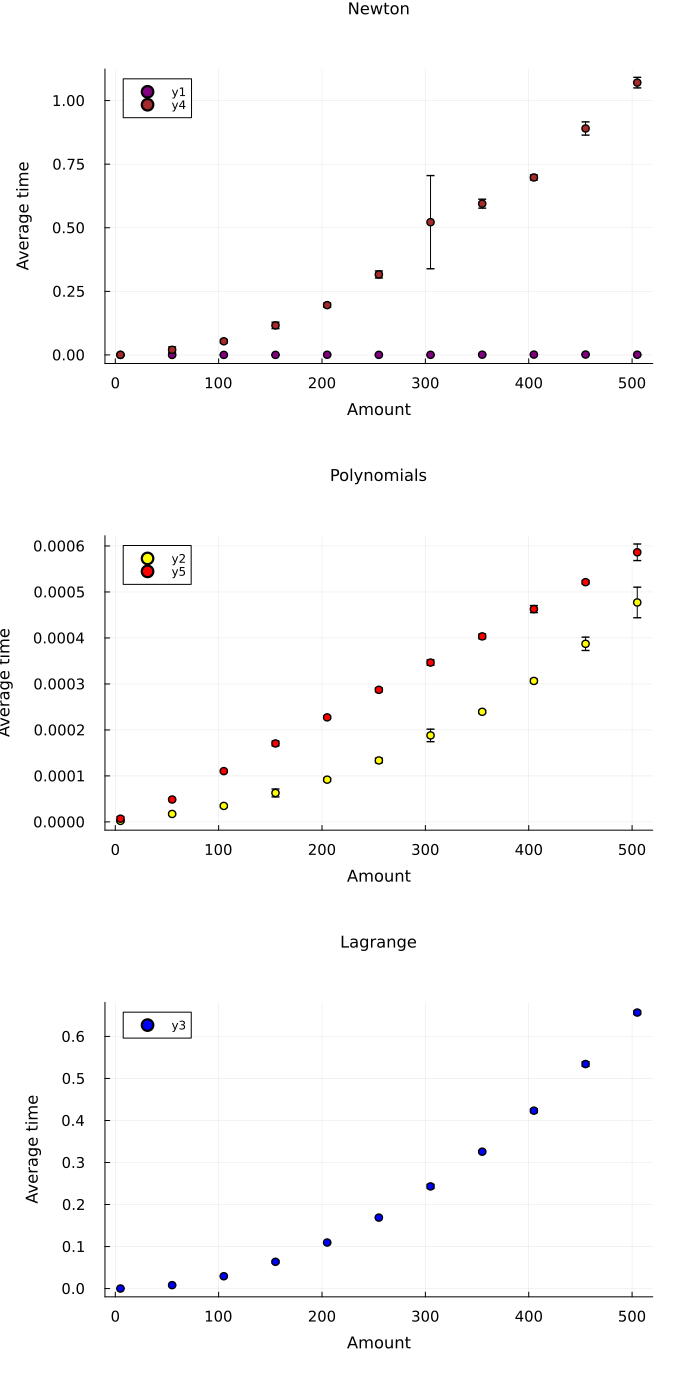

In [133]:
scatter(
    df2.Nodes, 
    size = (700, 1400), 
    margin=10mm,
    xtickfontsize=10, 
    ytickfontsize=10, 
    titlefontsize = 11,
    xlabel = "Amount",
    ylabel = "Average time",
    [df2.m_newt, df2.m_polyn, df2.m_lagr, df2.m_newt2, df2.m_polyn2], 
    title = ["Newton" "Polynomials" "Lagrange"], 
    color = [:purple :yellow :blue :brown :red],
    yerr = [df2.s_newt df2.s_polyn df2.s_lagr df2.s_newt2 df2.s_polyn2], 
    layout = grid(3,1),
    legend = true
)